In [1]:
import pandas as pd
import numpy as np
import requests
import pandas_datareader as pdr
import datetime
from tqdm import tqdm

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

import plotly.express as px

In [22]:
df = pd.read_csv('datasets/nasdaq_screener_1620487476799.csv')

In [23]:
df

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAL,American Airlines Group Inc. Common Stock,$22.00,0.51,2.373%,1.411043e+10,United States,NaN,31973741,Transportation,Air Freight/Delivery Services
1,AAPL,Apple Inc. Common Stock,$130.21,0.69,0.533%,2.257495e+12,United States,1980.0,78891430,Technology,Computer Manufacturing
2,ABMD,ABIOMED Inc. Common Stock,$296.81,1.09,0.369%,1.343687e+10,United States,NaN,183271,Health Care,Medical/Dental Instruments
3,ABNB,Airbnb Inc. Class A Common Stock,$151.21,-2.43,-1.582%,9.018149e+10,United States,2020.0,7126308,Capital Goods,Industrial Machinery/Components
4,ACGL,Arch Capital Group Ltd. Common Stock,$40.79,1.02,2.565%,1.645115e+10,Bermuda,NaN,2052665,Finance,Property-Casualty Insurers
...,...,...,...,...,...,...,...,...,...,...,...
273,ZI,ZoomInfo Technologies Inc. Class A Common Stock,$42.98,-2.59,-5.684%,1.682064e+10,United States,2020.0,3146535,Technology,Computer Software: Prepackaged Software
274,ZLAB,Zai Lab Limited American Depositary Shares,$158.14,2.56,1.645%,1.191988e+10,China,2017.0,586076,Health Care,Major Pharmaceuticals
275,ZM,Zoom Video Communications Inc. Class A Common ...,$295.24,2.19,0.747%,8.671613e+10,United States,2019.0,2444335,Consumer Services,Telecommunications Equipment
276,ZNGA,Zynga Inc. Class A Common Stock,$10.99,0.28,2.614%,1.192435e+10,United States,2011.0,15033638,Technology,EDP Services


In [24]:
ticker = df['Symbol']

In [25]:
%%time
df = pd.DataFrame()

for symbol in tqdm(ticker):
    try:
        df[symbol] = pdr.get_data_yahoo(symbol, start=datetime.datetime(2018, 1, 1), 
                                        end=datetime.datetime.now())["Adj Close"]
    except Exception as e:
        print(e)
        continue

100%|████████████████████████████████████████████████████████████████████████████████| 278/278 [04:21<00:00,  1.06it/s]

Wall time: 4min 21s


In [26]:
df

,AAL,AAPL,ABMD,ABNB,ACGL,ADBE,ADI,ADP,ADSK,AEP,...,XRAY,YNDX,Z,ZBRA,ZG,ZI,ZLAB,ZM,ZNGA,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,51.647556,41.310070,192.490005,NaN,29.433332,177.699997,84.586998,108.099258,107.120003,64.341667,...,65.382240,33.639999,42.480000,103.709999,42.299999,NaN,22.260000,NaN,3.92,NaN
2018-01-03,51.014027,41.302879,195.820007,NaN,29.459999,181.039993,85.636383,109.273544,109.379997,63.799629,...,65.158272,34.160000,42.970001,105.769997,42.730000,NaN,22.350000,NaN,4.02,NaN
2018-01-04,51.335667,41.494736,199.250000,NaN,29.570000,183.220001,85.542686,110.317375,112.070000,63.044357,...,65.148529,34.220001,42.130001,107.860001,42.009998,NaN,22.100000,NaN,3.89,NaN
2018-01-05,51.316177,41.967163,202.320007,NaN,29.453333,185.339996,85.889336,110.252121,110.839996,62.911060,...,66.063927,34.250000,42.610001,109.540001,42.340000,NaN,22.809999,NaN,3.89,NaN
2018-01-08,50.809345,41.811283,207.800003,NaN,29.456667,185.039993,86.039261,109.916618,111.419998,63.461987,...,66.511887,34.630001,42.759998,110.629997,42.619999,NaN,22.980000,NaN,3.91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,21.209999,124.970001,262.709991,135.750000,39.919998,474.160004,146.630005,192.520004,269.720001,86.519997,...,66.610001,62.540001,107.099998,471.970001,108.239998,39.709999,151.679993,290.160004,9.87,160.919998
2021-05-14,22.400000,127.449997,268.559998,141.199997,40.189999,486.559998,149.610001,194.639999,277.630005,86.760002,...,67.830002,63.430000,111.879997,486.730011,113.320000,40.200001,152.929993,307.890015,10.23,165.339996
2021-05-17,23.350000,126.269997,267.950012,132.500000,40.419998,482.739990,148.100006,194.570007,274.779999,85.449997,...,68.949997,63.669998,110.169998,482.010010,111.589996,39.990002,153.990005,308.929993,10.14,163.279999


In [31]:
t = datetime.datetime.today()
date = t.strftime('%d_%m_%Y')
date

'19_05_2021'

In [32]:

df.to_csv(f'datasets/tickers_{date}.csv')

In [33]:
df = pd.read_csv(f'datasets/tickers_{date}.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.drop('Date', axis=1, inplace=True)

In [34]:
df

,AAL,AAPL,ABMD,ABNB,ACGL,ADBE,ADI,ADP,ADSK,AEP,...,XRAY,YNDX,Z,ZBRA,ZG,ZI,ZLAB,ZM,ZNGA,ZS
2018-01-02,51.647556,41.310070,192.490005,NaN,29.433332,177.699997,84.586998,108.099258,107.120003,64.341667,...,65.382240,33.639999,42.480000,103.709999,42.299999,NaN,22.260000,NaN,3.92,NaN
2018-01-03,51.014027,41.302879,195.820007,NaN,29.459999,181.039993,85.636383,109.273544,109.379997,63.799629,...,65.158272,34.160000,42.970001,105.769997,42.730000,NaN,22.350000,NaN,4.02,NaN
2018-01-04,51.335667,41.494736,199.250000,NaN,29.570000,183.220001,85.542686,110.317375,112.070000,63.044357,...,65.148529,34.220001,42.130001,107.860001,42.009998,NaN,22.100000,NaN,3.89,NaN
2018-01-05,51.316177,41.967163,202.320007,NaN,29.453333,185.339996,85.889336,110.252121,110.839996,62.911060,...,66.063927,34.250000,42.610001,109.540001,42.340000,NaN,22.809999,NaN,3.89,NaN
2018-01-08,50.809345,41.811283,207.800003,NaN,29.456667,185.039993,86.039261,109.916618,111.419998,63.461987,...,66.511887,34.630001,42.759998,110.629997,42.619999,NaN,22.980000,NaN,3.91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,21.209999,124.970001,262.709991,135.750000,39.919998,474.160004,146.630005,192.520004,269.720001,86.519997,...,66.610001,62.540001,107.099998,471.970001,108.239998,39.709999,151.679993,290.160004,9.87,160.919998
2021-05-14,22.400000,127.449997,268.559998,141.199997,40.189999,486.559998,149.610001,194.639999,277.630005,86.760002,...,67.830002,63.430000,111.879997,486.730011,113.320000,40.200001,152.929993,307.890015,10.23,165.339996
2021-05-17,23.350000,126.269997,267.950012,132.500000,40.419998,482.739990,148.100006,194.570007,274.779999,85.449997,...,68.949997,63.669998,110.169998,482.010010,111.589996,39.990002,153.990005,308.929993,10.14,163.279999
2021-05-18,23.559999,124.849998,272.970001,135.020004,40.169998,480.619995,145.889999,192.539993,272.750000,85.750000,...,67.419998,64.690002,109.779999,477.549988,110.430000,40.619999,157.580002,312.859985,10.20,166.500000


In [35]:
assets = df.columns
assets

Index(['AAL', 'AAPL', 'ABMD', 'ABNB', 'ACGL', 'ADBE', 'ADI', 'ADP', 'ADSK',
       'AEP',
       ...
       'XRAY', 'YNDX', 'Z', 'ZBRA', 'ZG', 'ZI', 'ZLAB', 'ZM', 'ZNGA', 'ZS'],
      dtype='object', length=278)

In [36]:
# ! pip install PyPortfolioOpt

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [39]:
%%time
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(cleaned_weights, '\n')
ef.portfolio_performance(verbose=True)

OrderedDict([('AAL', 0.0), ('AAPL', 0.0), ('ABMD', 0.0), ('ABNB', 0.0), ('ACGL', 0.0), ('ADBE', 0.0), ('ADI', 0.0), ('ADP', 0.0), ('ADSK', 0.0), ('AEP', 0.0), ('AFRM', 0.0), ('AKAM', 0.0), ('ALGN', 0.0), ('ALNY', 0.0), ('ALXN', 0.0), ('AMAT', 0.0), ('AMD', 0.0), ('AMGN', 0.0), ('AMZN', 0.0), ('ANSS', 0.0), ('APP', 0.0), ('ARGX', 0.0), ('ARVL', 0.00165), ('ASML', 0.0), ('ATVI', 0.0), ('AVGO', 0.0), ('AZN', 0.0), ('BGNE', 0.0), ('BIDU', 0.0), ('BIIB', 0.0), ('BILI', 0.0), ('BKNG', 0.0), ('BLDR', 0.0), ('BMRN', 0.0), ('BNTX', 0.20634), ('BPY', 0.0), ('BRKR', 0.0), ('BSY', 0.12906), ('CDNS', 0.0), ('CDW', 0.0), ('CERN', 0.0), ('CG', 0.0), ('CGNX', 0.0), ('CHKP', 0.0), ('CHRW', 0.0), ('CHTR', 0.0), ('CINF', 0.0), ('CMCSA', 0.0), ('CME', 0.0), ('COIN', 0.0), ('COST', 0.0), ('COUP', 0.0), ('CPRT', 0.0), ('CREE', 0.0), ('CRWD', 0.0), ('CSCO', 0.0), ('CSGP', 0.0), ('CSX', 0.0), ('CTAS', 0.0), ('CTSH', 0.0), ('CTXS', 0.0), ('CVAC', 0.0), ('CZR', 0.0), ('DDOG', 0.0), ('DISCA', 0.0), ('DISCB', 0.0

(1.665960849222746, 0.3535268958284898, 4.655829213122354)

In [40]:
#! pip install cvxopt

In [41]:
import cvxpy
print(cvxpy.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']


In [42]:
%%time
def get_latest_prices_yahoo(df):
    df = pd.DataFrame()

    for symbol in tqdm(df.columns):
        try:
            df[symbol] = pdr.get_data_yahoo(symbol, start=datetime.datetime(2013, 1, 1), 
                                            end=datetime.datetime.now())["Adj Close"]
        except Exception as e:
            print(e)
            continue

Wall time: 0 ns


In [43]:
%%time
portfolio_val = 1000
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)
allocation, leftover = da.greedy_portfolio() # allocation, leftover = da.lp_portfolio(solver='ECOS_BB')
print('Discrete allocation:', allocation)
print('Funds Remaining, $', leftover)

Discrete allocation: {'KDP': 6, 'BNTX': 1, 'BSY': 2, 'ENPH': 1, 'FUTU': 1, 'DKNG': 1, 'LSXMB': 1, 'PTON': 1, 'ARVL': 1}
Funds Remaining, $ 21.609991073608413
Wall time: 5.98 ms


In [44]:
allocation

{'KDP': 6,
 'BNTX': 1,
 'BSY': 2,
 'ENPH': 1,
 'FUTU': 1,
 'DKNG': 1,
 'LSXMB': 1,
 'PTON': 1,
 'ARVL': 1}

In [45]:
df

,AAL,AAPL,ABMD,ABNB,ACGL,ADBE,ADI,ADP,ADSK,AEP,...,XRAY,YNDX,Z,ZBRA,ZG,ZI,ZLAB,ZM,ZNGA,ZS
2018-01-02,51.647556,41.310070,192.490005,NaN,29.433332,177.699997,84.586998,108.099258,107.120003,64.341667,...,65.382240,33.639999,42.480000,103.709999,42.299999,NaN,22.260000,NaN,3.92,NaN
2018-01-03,51.014027,41.302879,195.820007,NaN,29.459999,181.039993,85.636383,109.273544,109.379997,63.799629,...,65.158272,34.160000,42.970001,105.769997,42.730000,NaN,22.350000,NaN,4.02,NaN
2018-01-04,51.335667,41.494736,199.250000,NaN,29.570000,183.220001,85.542686,110.317375,112.070000,63.044357,...,65.148529,34.220001,42.130001,107.860001,42.009998,NaN,22.100000,NaN,3.89,NaN
2018-01-05,51.316177,41.967163,202.320007,NaN,29.453333,185.339996,85.889336,110.252121,110.839996,62.911060,...,66.063927,34.250000,42.610001,109.540001,42.340000,NaN,22.809999,NaN,3.89,NaN
2018-01-08,50.809345,41.811283,207.800003,NaN,29.456667,185.039993,86.039261,109.916618,111.419998,63.461987,...,66.511887,34.630001,42.759998,110.629997,42.619999,NaN,22.980000,NaN,3.91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,21.209999,124.970001,262.709991,135.750000,39.919998,474.160004,146.630005,192.520004,269.720001,86.519997,...,66.610001,62.540001,107.099998,471.970001,108.239998,39.709999,151.679993,290.160004,9.87,160.919998
2021-05-14,22.400000,127.449997,268.559998,141.199997,40.189999,486.559998,149.610001,194.639999,277.630005,86.760002,...,67.830002,63.430000,111.879997,486.730011,113.320000,40.200001,152.929993,307.890015,10.23,165.339996
2021-05-17,23.350000,126.269997,267.950012,132.500000,40.419998,482.739990,148.100006,194.570007,274.779999,85.449997,...,68.949997,63.669998,110.169998,482.010010,111.589996,39.990002,153.990005,308.929993,10.14,163.279999
2021-05-18,23.559999,124.849998,272.970001,135.020004,40.169998,480.619995,145.889999,192.539993,272.750000,85.750000,...,67.419998,64.690002,109.779999,477.549988,110.430000,40.619999,157.580002,312.859985,10.20,166.500000


In [46]:
# ! pip uninstall cvxopt
# ! export CVXOPT_BUILD_GLPK=1
# !pip install cvxopt --no-binary cvxopt

In [47]:
def get_company_name(symbol):
    url = 'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query='+symbol+'&region=1&lang=en'
    result = requests.get(url).json()
    for r in result['ResultSet']['Result']:
        if r['symbol']==symbol:
            return r['name']

In [48]:
company_name = []
for symbol in allocation:
    company_name.append(get_company_name(symbol))

In [49]:
discrete_allocation_list = []
for symbol in allocation:
    discrete_allocation_list.append(allocation.get(symbol))

In [71]:
portfolio_df = pd.DataFrame(columns=['Company_name', 'Company_Ticker', 'Discrete_val_'+str(portfolio_val), 'latest_prices',
                                    'port'])

portfolio_df['Company_name'] = company_name
portfolio_df['Company_Ticker'] = allocation
portfolio_df['Discrete_val_'+str(portfolio_val)] = discrete_allocation_list
portfolio_df['latest_prices'] = np.round(get_latest_prices(df)[allocation].values, 2)
portfolio_df['port'] = portfolio_df['latest_prices'] * portfolio_df['Discrete_val_'+str(portfolio_val)]
portfolio_df = portfolio_df.sort_values(by='Discrete_val_'+str(portfolio_val), ascending=False)
portfolio_df

,Company_name,Company_Ticker,Discrete_val_1000,latest_prices,port
0,Keurig Dr Pepper Inc.,KDP,6,35.79,214.74
2,"Bentley Systems, Incorporated",BSY,2,52.00,104.00
1,BioNTech SE,BNTX,1,199.08,199.08
3,"Enphase Energy, Inc.",ENPH,1,130.67,130.67
4,Futu Holdings Limited,FUTU,1,125.00,125.00
5,DraftKings Inc.,DKNG,1,43.44,43.44
6,The Liberty SiriusXM Group,LSXMB,1,46.49,46.49
7,"Peloton Interactive, Inc.",PTON,1,96.55,96.55
8,Arrival,ARVL,1,18.42,18.42


In [62]:
allocation

{'KDP': 6,
 'BNTX': 1,
 'BSY': 2,
 'ENPH': 1,
 'FUTU': 1,
 'DKNG': 1,
 'LSXMB': 1,
 'PTON': 1,
 'ARVL': 1}

In [66]:
get_latest_prices(df)[allocation].values

array([ 35.79000092, 199.08000183,  52.        , 130.66999817,
       125.        ,  43.43999863,  46.49000168,  96.55000305,
        18.42000008])

In [57]:
allocation

{'KDP': 6,
 'BNTX': 1,
 'BSY': 2,
 'ENPH': 1,
 'FUTU': 1,
 'DKNG': 1,
 'LSXMB': 1,
 'PTON': 1,
 'ARVL': 1}

In [22]:
portfolio_df.to_csv('datasets/portfolio.csv', index=False)

<AxesSubplot:>

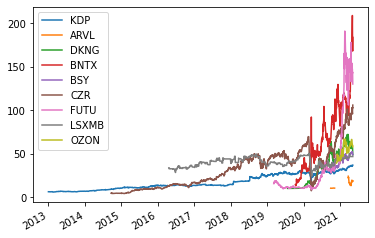

In [99]:
df[portfolio_df['Company_Ticker']].plot()

In [102]:
tickers_portfolio = list(portfolio_df['Company_Ticker'])
tickers_portfolio

['KDP', 'ARVL', 'DKNG', 'BNTX', 'BSY', 'CZR', 'FUTU', 'LSXMB', 'OZON']

In [1]:
fig = px.line(df.reset_index(), x="index", y=tickers_portfolio)
fig.show()

NameError: name 'px' is not defined